# Machine Learning Zoomcamp

## Home work week three

Questions: https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/03-classification/homework.md

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 999

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score

%matplotlib inline

In [2]:
airbnb_data = pd.read_csv('data/airbnb_data/AB_NYC_2019.csv')

In [3]:
columns = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price', 
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [4]:
df = airbnb_data[columns]
df = df.fillna(0)

In [5]:
df.isnull().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Question 1: What is the most frequent observation (mode) for the column 'neighbourhood_group'

In [6]:
df['neighbourhood_group'].mode()

0    Manhattan
dtype: object

### Split the data: 60%/20%/20%

In [7]:
features = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [8]:
from sklearn.model_selection import train_test_split

In [86]:
np.random.seed(42)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

df_train, df_val  = train_test_split(df_full_train, test_size=0.25, random_state=1) # 25% here means it will be 20% of the overall data set

len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [87]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

y_train = df_train['price']
y_val = df_val['price']
y_test = df_test['price']

del df_train['price']
del df_val['price']
del df_test['price']

### Question 2: What are the two features that have the biggest correlation in this dataset?

In [11]:
df_train.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [12]:
numerical = ['latitude', 'longitude', 'reviews_per_month', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

In [75]:
correlations = df_train[numerical].corr()
correlations

,latitude,longitude,reviews_per_month,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.084313,-0.025427,0.019638,-0.020536,0.019039,-0.012974
longitude,0.084313,1.000000,0.136407,-0.062937,0.058299,-0.117029,0.082892
reviews_per_month,-0.025427,0.136407,1.000000,-0.120368,0.599733,-0.045017,0.168808
minimum_nights,0.019638,-0.062937,-0.120368,1.000000,-0.075564,0.120308,0.140542
number_of_reviews,-0.020536,0.058299,0.599733,-0.075564,1.000000,-0.072518,0.173308
calculated_host_listings_count,0.019039,-0.117029,-0.045017,0.120308,-0.072518,1.000000,0.229346
availability_365,-0.012974,0.082892,0.168808,0.140542,0.173308,0.229346,1.000000


<AxesSubplot:>

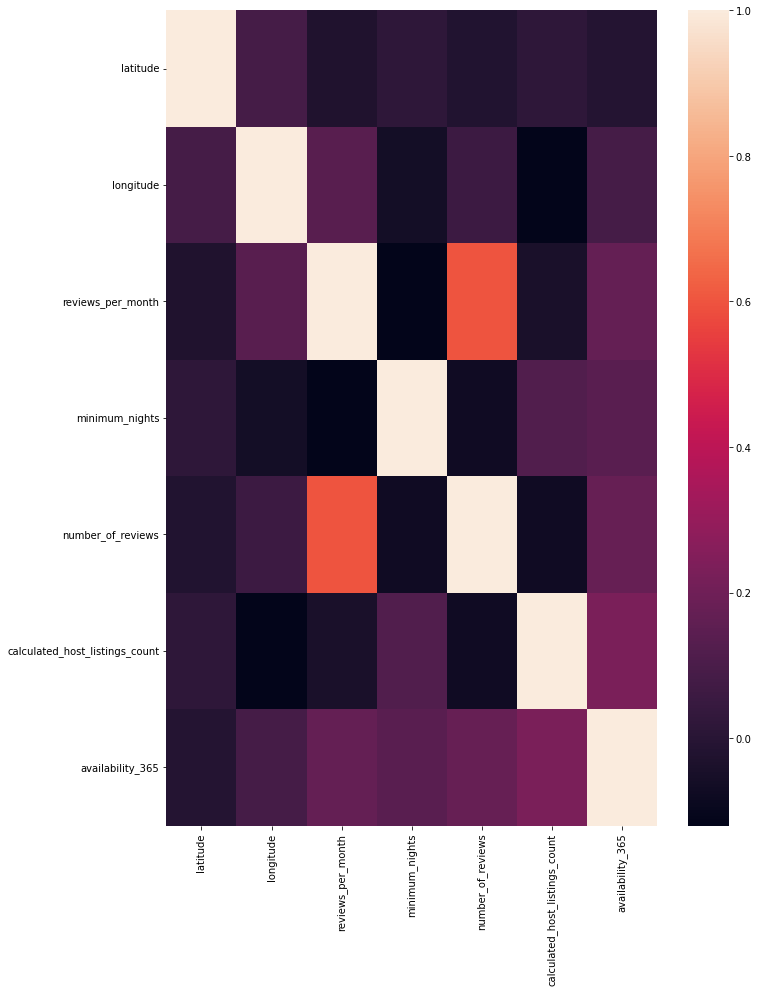

In [76]:
plt.figure(figsize=(11, 15))
sns.heatmap(correlations)

`number of reviews` and `reviews per month` have the biggest correlation

In [14]:
above_average = y_train.apply(lambda x: 1 if x >= 152 else 0)
above_average

385      0
33147    0
33881    1
37208    0
7485     1
        ..
2738     0
25619    0
40278    0
17605    1
22406    1
Name: price, Length: 29337, dtype: int64

## Question 3 Which of the two categorical variables has bigger the mutual information score?

In [15]:
round(mutual_info_score(above_average, df_train['neighbourhood_group']),2)

0.05

In [16]:
round(mutual_info_score(above_average, df_train['room_type']),2)

0.14

///////////////////// NOTE for self ///////////////////////////

I missed here that the y should become the above_average and this should have been applied to all sets :( **Below code is therefore incorrect!**

//////////////////////////////////////////////////////////////////////

## Question 4: Calculate the accuracy on the validation dataset and rount it to 2 decimal digits.

In [17]:
train_dicts = df_train[['room_type', 'neighbourhood_group'] + numerical].to_dict(orient='records')

In [18]:
dv = DictVectorizer(sparse=False)

In [19]:
X_train = dv.fit_transform(train_dicts)

In [20]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

In [21]:
val_dicts = df_val[['neighbourhood_group', 'room_type'] + numerical].to_dict(orient='records')

In [22]:
X_val = dv.transform(val_dicts)

In [33]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)

In [34]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [35]:
model.predict_proba(X_val)

array([[1.41824826e-04, 9.36437145e-04, 7.91878955e-05, ...,
        2.46477735e-05, 1.23439117e-04, 1.45184892e-04],
       [1.87156732e-04, 6.46147691e-04, 7.96147060e-06, ...,
        1.42786072e-05, 3.00316163e-05, 2.23625021e-04],
       [9.99040234e-05, 7.06982750e-04, 5.75557170e-09, ...,
        5.72258321e-06, 5.92244915e-07, 1.09893179e-11],
       ...,
       [3.98860675e-05, 5.92724759e-04, 1.93306252e-05, ...,
        2.66578378e-05, 1.06502789e-04, 1.12276125e-04],
       [3.84973688e-05, 5.82599836e-04, 1.20126948e-05, ...,
        2.25593377e-05, 6.95800316e-05, 9.84239942e-05],
       [1.32845849e-04, 3.95182602e-04, 2.68155028e-52, ...,
        4.69156653e-14, 4.32762867e-31, 6.19242064e-07]])

In [36]:
y_pred = model.predict(X_val)

In [42]:
round((y_val == y_pred).mean(), 2)

0.07

answer incorrect :( correct answer 0.79 Below is me correcting where I went wrong to check the code shown in class

In [83]:
y_train

385      0
33147    0
33881    0
37208    0
7485     0
        ..
2738     0
25619    0
40278    0
17605    0
22406    0
Name: price, Length: 29337, dtype: int64

In [88]:
y_train = y_train.apply(lambda x: 1 if x >= 152 else 0)
y_val = y_val.apply(lambda x: 1 if x >= 152 else 0)
y_test = y_test.apply(lambda x: 1 if x >= 152 else 0)

In [89]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [90]:
model.predict_proba(X_val)

array([[0.88754142, 0.11245858],
       [0.62436154, 0.37563846],
       [0.40125988, 0.59874012],
       ...,
       [0.40256922, 0.59743078],
       [0.53251671, 0.46748329],
       [0.52431712, 0.47568288]])

In [91]:
y_pred = model.predict(X_val)

In [92]:
round((y_val == y_pred).mean(), 2)

0.79

## Question 5: Which feature has the smallest impact on accuracy

In [43]:
def model_accuracy(train, val):
        train_dicts = train.to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dicts)
        val_dicts = val.to_dict(orient='records')
        X_val = dv.transform(val_dicts)
        model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        return round((y_val == y_pred).mean(), 2)

In [44]:
features_without_neighbourhood_group = np.array([x for x in features if x != 'neighbourhood_group'])
features_without_room_type = np.array([x for x in features if x != 'room_type'])
features_without_number_of_reviews = np.array([x for x in features if x != 'number_of_reviews'])
features_without_reviews_per_month = np.array([x for x in features if x != 'reviews_per_month'])

In [52]:
X_train_without_room_type = df_train[features_without_room_type]
X_train_without_neighbourhood_group = df_train[features_without_neighbourhood_group]
X_train_without_number_of_reviews = df_train[features_without_number_of_reviews]
X_train_without_reviews_per_month = df_train[features_without_reviews_per_month]


In [53]:
X_val_without_room_type = df_val[features_without_room_type]
X_val_without_neighbourhood_group = df_val[features_without_neighbourhood_group]
X_val_without_number_of_reviews = df_val[features_without_number_of_reviews]
X_val_without_reviews_per_month = df_val[features_without_reviews_per_month]


In [59]:
model_without_room_type = model_accuracy(X_train_without_room_type, X_val_without_room_type)

In [60]:
model_without_room_type

0.05

In [54]:
model_without_neighbourhood_group = model_accuracy(X_train_without_neighbourhood_group, X_val_without_neighbourhood_group)
model_without_number_of_reviews = model_accuracy(X_train_without_number_of_reviews, X_val_without_number_of_reviews)
model_without_reviews_per_month = model_accuracy(X_train_without_reviews_per_month, X_val_without_reviews_per_month)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [61]:
print(f'model_without_room_type: {model_without_room_type}')
print()
print(f'model_without_neighbourhood_group: {model_without_neighbourhood_group}')
print()
print(f'model_without_number_of_reviews:  {model_without_number_of_reviews}')
print()
print(f'model_without_reviews_per_month: {model_without_reviews_per_month}')


model_without_room_type: 0.05

model_without_neighbourhood_group: 0.06

model_without_number_of_reviews:  0.07

model_without_reviews_per_month: 0.07


////////////////////// NOTE //////////////////////

first save original accuracy
copy features minus one feature, then train etc as above
Again above my y is incorrect :( 
Also what we were interested in was the smallest difference (can be negative or positive)

answer was number of reviews
//////////////////////////////////////////////////

Code below is corrected for incorrect y

In [99]:
original_accuracy = (y_val == y_pred).mean()

In [100]:
original_accuracy

0.7929236118212496

In [101]:
def model_accuracy(feature_to_remove):
        print(feature_to_remove)
        print()
        X_train_without_room_type = df_train[feature_to_remove]
        X_val_without_room_type = df_val[feature_to_remove]
        sub_features = np.array([x for x in features if x != feature_to_remove])
        train_dicts = df_train[sub_features].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dicts)
        val_dicts = df_val[sub_features].to_dict(orient='records')
        X_val = dv.transform(val_dicts)
        model = LogisticRegression(solver='liblinear', C=1.0, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        diff = original_accuracy - (y_val == y_pred).mean()
        print(round(diff, 2))
        print()
        print()

In [102]:
model_accuracy('room_type')
model_accuracy('neighbourhood_group')
model_accuracy('number_of_reviews')
model_accuracy('reviews_per_month')

room_type

0.06


neighbourhood_group

0.05


number_of_reviews

0.0


reviews_per_month

0.0




## Question 6

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [103]:
def rmse(y, y_pred):
    err = y - y_pred
    se = err ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [104]:
y_train = np.log1p(y_train)

In [105]:
from sklearn.linear_model import Ridge

In [106]:
alpha = [0, 0.01, 0.1, 1, 10]

In [108]:
for a in alpha:
    print(f'alpha: {a}')
    clf = Ridge(alpha=a)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(rmse(y_pred, y_val).round(3))

alpha: 0
0.392
alpha: 0.01
0.392
alpha: 0.1
0.392
alpha: 1
0.392
alpha: 10
0.393


///////////////////////// NOTE //////////////////////

These were totally off unfotunately. However I went with the smallest relative to my answers and that was correct.

## Summary of my performance

Not bad but I need to pay attention to the details as a small error heavily affects the results :D Perhaps also not rushing would have helped this week!